# Лабораторная работа 9. Деревья решений

In [ ]:
!pip install utils.py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.7 MB/s eta 0:00:00
  Created wheel for utils.py: filename=utils_py-0.3.0-py3-none-any.whl size=12321 sha256=22cf708d5c2c2fb768d7170c9f3dcf980fe189d856cc60181b8b27e2f11ea618
  Stored in directory: /root/.cache/pip/wheels/66/77/84/11d6808ddbebd6f12cc980cc8ec8227d63cf8eb0743a115ac0
Successfully built utils.py


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns # для простого отображения

In [ ]:
df=pd.read_csv('ParisHousingClass.csv')
cols_drop = ['numberOfRooms', 'floors', 'cityCode', 'numPrevOwners', 'basement', 'attic', 'garage', 'made']
df = df.drop(columns=cols_drop)
X=df.iloc[:,:9]
y=df.iloc[:,9]
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
df = df_new_sm
df.head(10)

(17470, 9)
(10000, 9)


,squareMeters,hasYard,hasPool,cityPartRange,isNewBuilt,hasStormProtector,hasStorageRoom,hasGuestRoom,price,category
0,75523,0,1,3,0,1,0,7,7559081.5,Basic
1,80771,1,1,8,1,0,1,2,8085989.5,Luxury
2,55712,0,1,6,0,0,1,9,5574642.1,Basic
3,32316,0,0,10,0,1,0,3,3232561.2,Basic
4,70429,1,1,3,1,0,1,4,7055052.0,Luxury
5,39223,0,1,8,0,1,0,1,3926647.2,Basic
6,58682,1,1,10,1,1,0,5,5876376.5,Luxury
7,86929,1,0,3,1,0,0,10,8696869.3,Basic
8,51522,0,0,8,1,1,1,5,5154055.2,Basic
9,39686,0,0,5,1,1,1,3,3970892.1,Basic


In [ ]:
X=df.iloc[:, [4, 5]]
y=df.iloc[:,9]

In [ ]:
X

,isNewBuilt,hasStormProtector
0,0,1
1,1,0
2,0,0
3,0,1
4,1,0
...,...,...
17465,1,0
17466,1,0
17467,1,0
17468,1,0


In [ ]:
y

0         Basic
1        Luxury
2         Basic
3         Basic
4        Luxury
          ...  
17465    Luxury
17466    Luxury
17467    Luxury
17468    Luxury
17469    Luxury
Name: category, Length: 17470, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

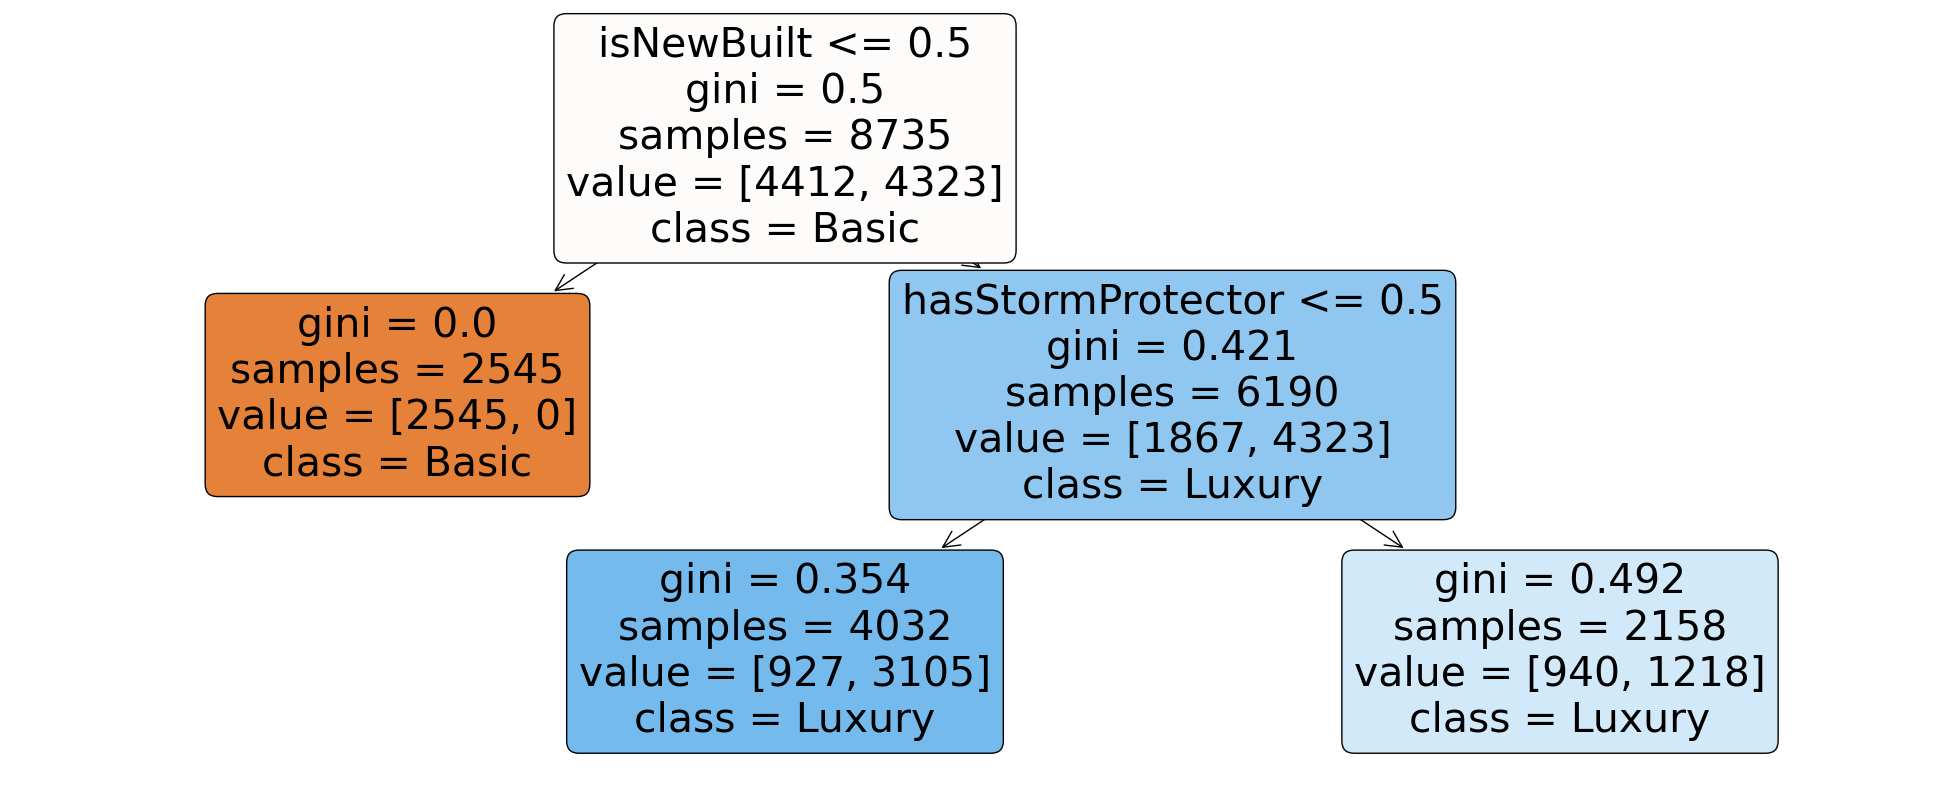

Проверка на новом образце ['Luxury']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names= X.columns.tolist(),class_names=y.unique(),rounded=True)
plt.show()
# проверка на новых образцах
sample_1=clf.predict([[3,4]])
print(f"Проверка на новом образце {sample_1}")

              precision    recall  f1-score   support

       Basic       1.00      0.57      0.73      4323
      Luxury       0.70      1.00      0.83      4412

    accuracy                           0.79      8735
   macro avg       0.85      0.78      0.78      8735
weighted avg       0.85      0.79      0.78      8735

[[2464 1859]
 [   0 4412]]


Text(0.5, 1.1, 'Матрица неточности \n')

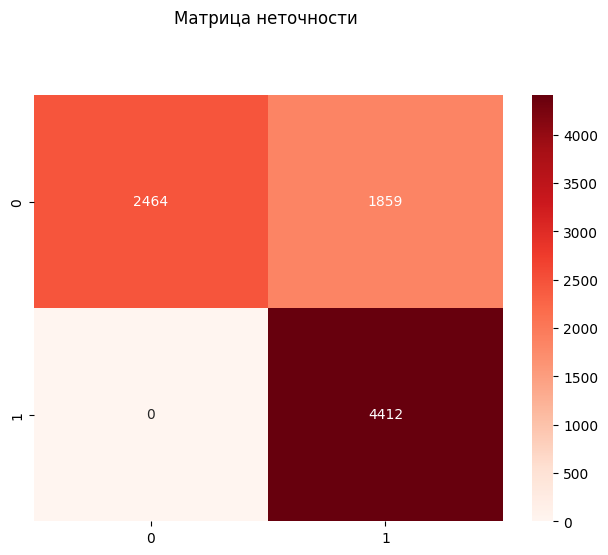

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# оценка точности модели
print(metrics.classification_report(y_test, y_score))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_score)
print(confusion_matrix)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности \n', y=1.1)

In [ ]:
value = ["Basic", "Luxury"]
words = {"Basic":0, "Luxury":1 }
y_test_n = np.array([words.get(i,0) for i in y_test])

y_pred_n = np.array([words.get(i,0) for i in y_score])

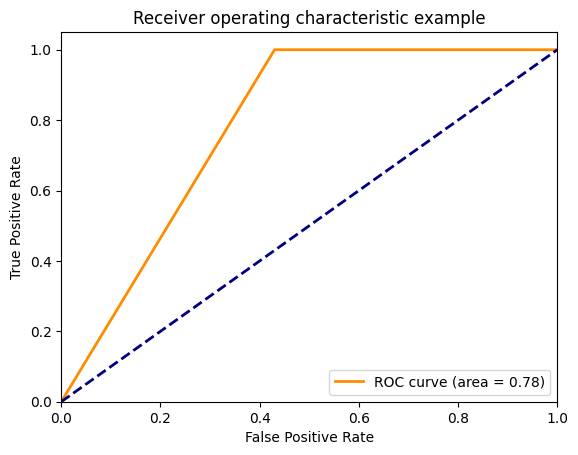

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test_n > 0, y_pred_n  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

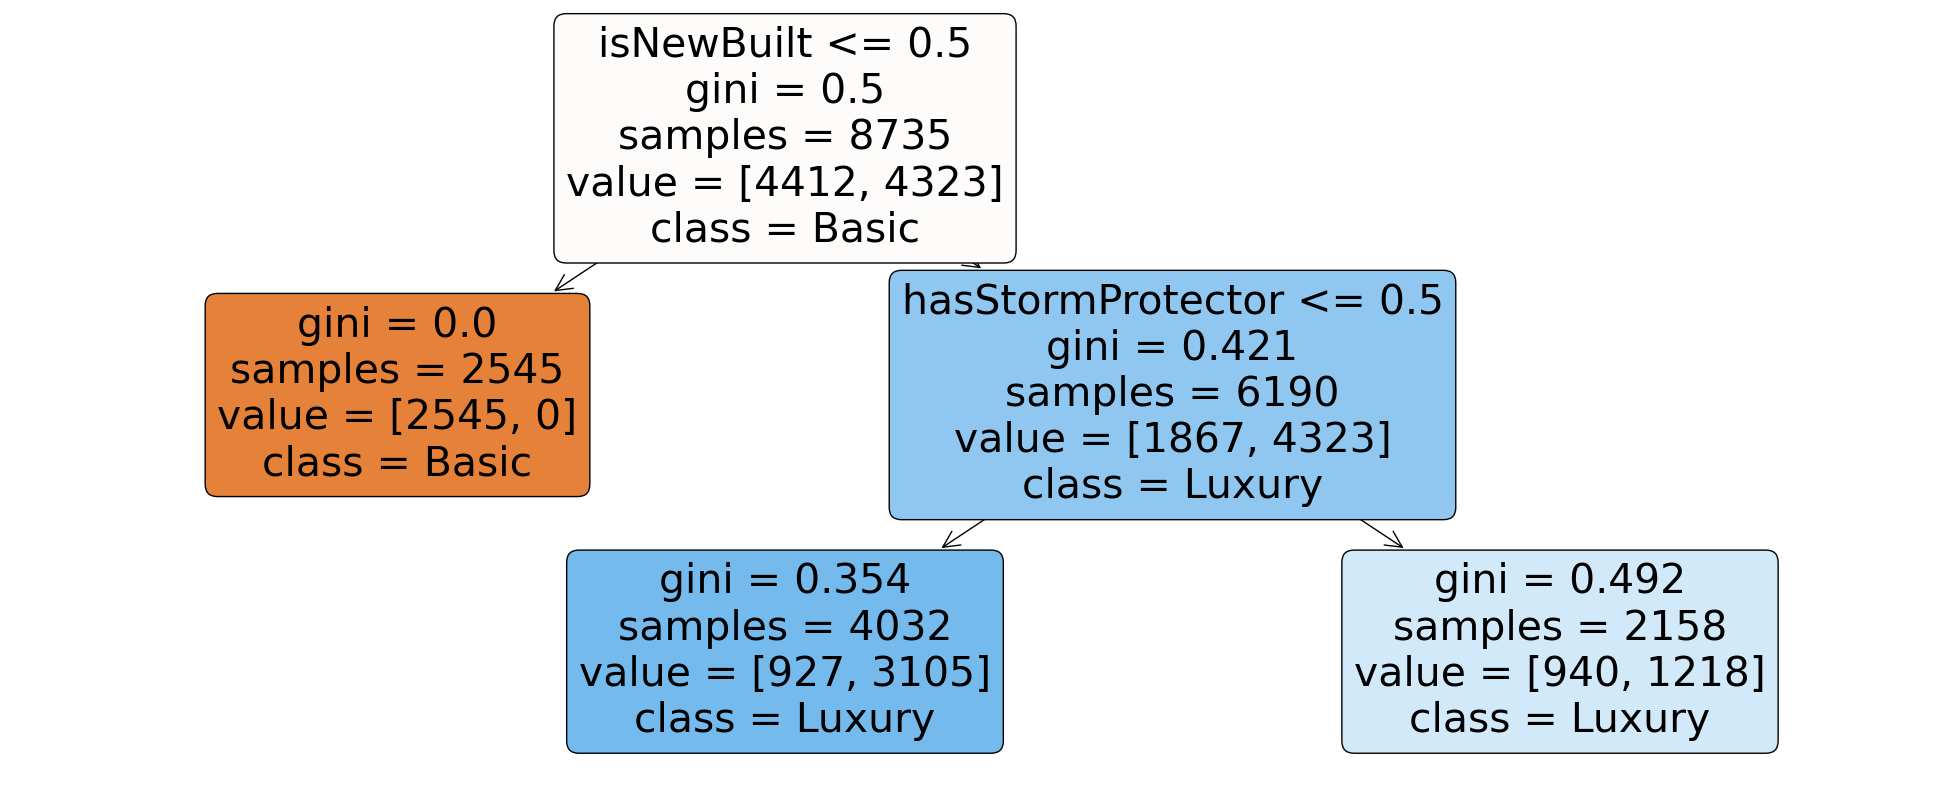

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Проверка на новом образце ['Luxury']


'Сейв.pdf'

In [ ]:
clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test)
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names= X.columns.tolist(),class_names=y.unique(),rounded=True)
plt.show()
# проверка на новых образцах
sample_1=clf.predict([[3,4]])
print(f"Проверка на новом образце {sample_1}")
import graphviz # подключаем библиотеку для отображения деревьев
dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл)
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("Сейв") # отображаем в файл (по умолчанию pdf)

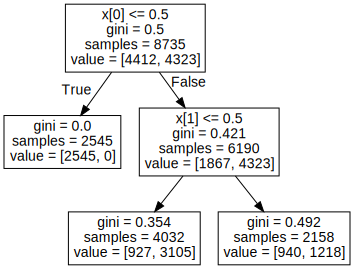

In [ ]:
graphviz.Source(dot_data)

In [ ]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=X.columns.tolist()) # переводим дерево в текстовую строку
print(r) # печатаем

|--- isNewBuilt <= 0.50
|   |--- class: Basic
|--- isNewBuilt >  0.50
|   |--- hasStormProtector <= 0.50
|   |   |--- class: Luxury
|   |--- hasStormProtector >  0.50
|   |   |--- class: Luxury



0.7871780194619348
              precision    recall  f1-score   support

       Basic       1.00      0.57      0.73      4323
      Luxury       0.70      1.00      0.83      4412

    accuracy                           0.79      8735
   macro avg       0.85      0.78      0.78      8735
weighted avg       0.85      0.79      0.78      8735

[[2464 1859]
 [   0 4412]]


Text(0.5, 1.1, 'Матрица неточности \n')

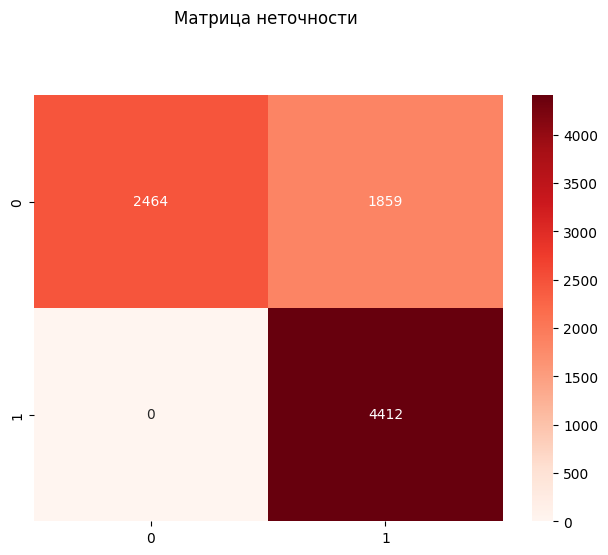

In [ ]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(score)

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))
# матрица неточности
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности \n', y=1.1)

In [ ]:
value = ["Низкий", "Средний", "Высокий"]
words = {"Низкий":0, "Средний":1,"Высокий":2 }
y_test_n = np.array([words.get(i,0) for i in y_test])

y_pred_n = np.array([words.get(i,0) for i in y_pred])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


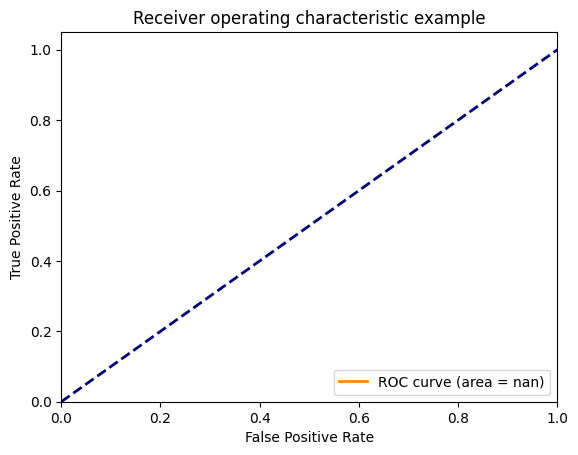

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test_n > 0, y_pred_n  > 0)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Визуализация леса

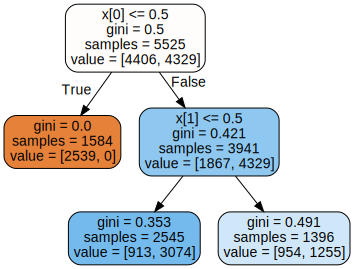

In [ ]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране